<a href="https://colab.research.google.com/github/ananyag3110/VAP_Deep-Learning/blob/main/RNN_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense , Dropout
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Google_Stock_Price_Train.csv')

In [ ]:
data.shape

(1258, 6)

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [ ]:
data.shape

(1258, 9)

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500",2012,1,3
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400",2012,1,4
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300",2012,1,5
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900",2012,1,6
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800",2012,1,9


In [ ]:
features=['year','month','day']
x=data[features]
y=data['Open']

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
y_scaled=scaler.fit_transform(y.values.reshape(-1,1))
#-1 in reshape is done when you are not sure of no. of rows and 1 is no.of column

In [ ]:
timesteps= 50
x_sequences=[]
y_sequences=[]
for i in range(timesteps,len(x_scaled)):
  x_sequences.append(x_scaled[i-timesteps:i])
  y_sequences.append(y_scaled[i])
x_sequences,y_sequences=np.array(x_sequences), np.array(y_sequences)
x_train,x_test,y_train,y_test=train_test_split(x_sequences,y_sequences,test_size=0.2,random_state=0)


RNN


In [ ]:
model=Sequential()
model.add(SimpleRNN(units=50,activation='tanh',input_shape=(50,3), return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(50))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])


In [ ]:
model.fit(x_train,y_train,epochs=10, batch_size=10,verbose=1)

Epoch 1/10
97/97 [==============================] - 5s 23ms/step - loss: 0.3421 - mse: 0.3421
Epoch 2/10
97/97 [==============================] - 4s 43ms/step - loss: 0.2006 - mse: 0.2006
Epoch 3/10
97/97 [==============================] - 2s 24ms/step - loss: 0.1492 - mse: 0.1492
Epoch 4/10
97/97 [==============================] - 2s 23ms/step - loss: 0.1095 - mse: 0.1095
Epoch 5/10
97/97 [==============================] - 2s 24ms/step - loss: 0.0821 - mse: 0.0821
Epoch 6/10
97/97 [==============================] - 2s 24ms/step - loss: 0.0651 - mse: 0.0651
Epoch 7/10
97/97 [==============================] - 3s 35ms/step - loss: 0.0550 - mse: 0.0550
Epoch 8/10
97/97 [==============================] - 2s 24ms/step - loss: 0.0443 - mse: 0.0443
Epoch 9/10
97/97 [==============================] - 2s 23ms/step - loss: 0.0344 - mse: 0.0344
Epoch 10/10
97/97 [==============================] - 2s 24ms/step - loss: 0.0315 - mse: 0.0315


In [ ]:
y_pred_scaled=model.predict(x_test)

y_pred=scaler.inverse_transform(y_pred_scaled)
y_test_true=scaler.inverse_transform(y_test)

8/8 [==============================] - 0s 9ms/step


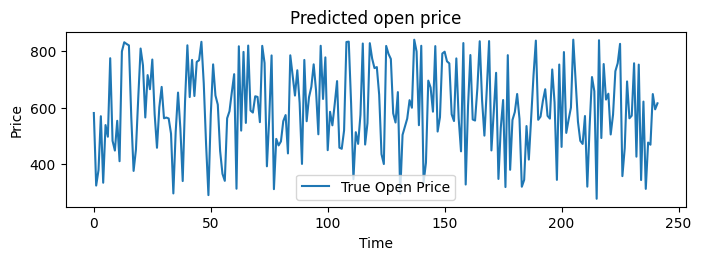

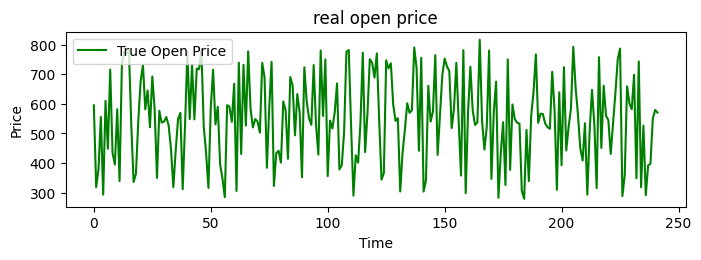

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
plt.plot(y_pred,label='True Open Price')
plt.title('Predicted open price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
plt.plot(y_test_true,label='True Open Price', color='green')
plt.title('real open price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()


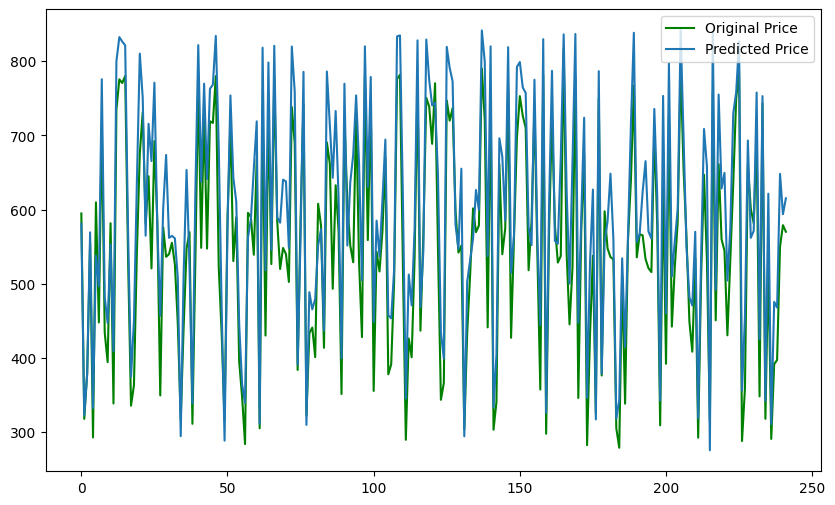

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test_true,color='green',label='Original Price')
plt.plot(y_pred,label='Predicted Price')
plt.legend()

In [ ]:
vanilla_model=Sequential()
vanilla_model.add(SimpleRNN(units=50,activation='tanh',input_shape=(50,3), return_sequences=True))
vanilla_model.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
vanilla_model.add(Dense(1,activation='linear'))
vanilla_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])


In [ ]:
vanilla_model.fit(x_train,y_train,epochs=10, batch_size=10,verbose=1)

Epoch 1/10
97/97 [==============================] - 3s 13ms/step - loss: 0.0277 - mse: 0.0277
Epoch 2/10
97/97 [==============================] - 1s 13ms/step - loss: 0.0092 - mse: 0.0092
Epoch 3/10
97/97 [==============================] - 1s 13ms/step - loss: 0.0098 - mse: 0.0098
Epoch 4/10
97/97 [==============================] - 1s 13ms/step - loss: 0.0086 - mse: 0.0086
Epoch 5/10
97/97 [==============================] - 1s 13ms/step - loss: 0.0113 - mse: 0.0113
Epoch 6/10
97/97 [==============================] - 2s 19ms/step - loss: 0.0090 - mse: 0.0090
Epoch 7/10
97/97 [==============================] - 2s 19ms/step - loss: 0.0082 - mse: 0.0082
Epoch 8/10
97/97 [==============================] - 1s 13ms/step - loss: 0.0081 - mse: 0.0081
Epoch 9/10
97/97 [==============================] - 1s 13ms/step - loss: 0.0082 - mse: 0.0082
Epoch 10/10
97/97 [==============================] - 1s 13ms/step - loss: 0.0072 - mse: 0.0072


In [ ]:
y_pred_scaled=vanilla_model.predict(x_test)

y_pred=scaler.inverse_transform(y_pred_scaled)
y_test_true=scaler.inverse_transform(y_test)

8/8 [==============================] - 0s 10ms/step


ValueError: Found array with dim 3. None expected <= 2.

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test_true,color='red',label='Original Price')
plt.plot(y_pred,color='blue',label='Predicted Price')

LSTM

Vanilla LSTM


In [ ]:
from keras.layers import LSTM
vanilla_model=Sequential()
vanilla_model.add(LSTM(units=50,activation='tanh',input_shape=(timesteps,3)))
vanilla_model.add(Dropout(0.2))
vanilla_model.add(Dense(1,activation='linear'))
vanilla_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])

In [ ]:
vanilla_model.fit(x_train,y_train,epochs=10, batch_size=10,verbose=1)

Epoch 1/10
97/97 [==============================] - 3s 10ms/step - loss: 0.0290 - mse: 0.0290
Epoch 2/10
97/97 [==============================] - 1s 15ms/step - loss: 0.0118 - mse: 0.0118
Epoch 3/10
97/97 [==============================] - 2s 17ms/step - loss: 0.0100 - mse: 0.0100
Epoch 4/10
97/97 [==============================] - 1s 10ms/step - loss: 0.0104 - mse: 0.0104
Epoch 5/10
97/97 [==============================] - 1s 11ms/step - loss: 0.0096 - mse: 0.0096
Epoch 6/10
97/97 [==============================] - 1s 13ms/step - loss: 0.0098 - mse: 0.0098
Epoch 7/10
97/97 [==============================] - 2s 16ms/step - loss: 0.0093 - mse: 0.0093
Epoch 8/10
97/97 [==============================] - 1s 10ms/step - loss: 0.0086 - mse: 0.0086
Epoch 9/10
97/97 [==============================] - 1s 10ms/step - loss: 0.0088 - mse: 0.0088
Epoch 10/10
97/97 [==============================] - 1s 11ms/step - loss: 0.0090 - mse: 0.0090


In [ ]:
y_pred_scaled=vanilla_model.predict(x_test)

y_pred=scaler.inverse_transform(y_pred_scaled)
y_test_true=scaler.inverse_transform(y_test)

8/8 [==============================] - 1s 7ms/step


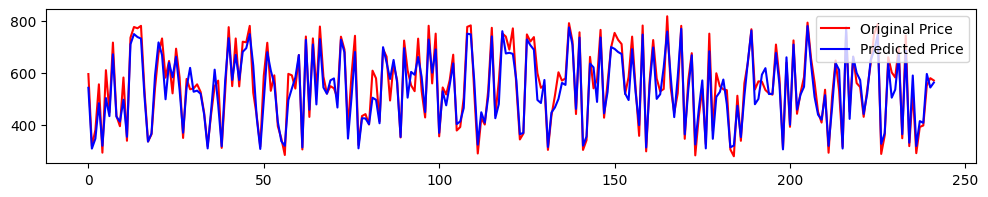

In [ ]:
plt.figure(figsize=(12,2))
plt.plot(y_test_true,color='red',label='Original Price')
plt.plot(y_pred,color='blue',label='Predicted Price')
plt.legend()

Stacked LSTM

In [ ]:

model=Sequential()
model.add(LSTM(units=50,activation='tanh',input_shape=(50,3), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,activation='tanh',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])

In [ ]:
model.fit(x_train,y_train,epochs=10, batch_size=10,verbose=1)

Epoch 1/10
97/97 [==============================] - 9s 48ms/step - loss: 0.0258 - mse: 0.0258
Epoch 2/10
97/97 [==============================] - 4s 40ms/step - loss: 0.0110 - mse: 0.0110
Epoch 3/10
97/97 [==============================] - 4s 37ms/step - loss: 0.0102 - mse: 0.0102
Epoch 4/10
97/97 [==============================] - 4s 40ms/step - loss: 0.0102 - mse: 0.0102
Epoch 5/10
97/97 [==============================] - 4s 36ms/step - loss: 0.0106 - mse: 0.0106
Epoch 6/10
97/97 [==============================] - 3s 34ms/step - loss: 0.0098 - mse: 0.0098
Epoch 7/10
97/97 [==============================] - 3s 32ms/step - loss: 0.0094 - mse: 0.0094
Epoch 8/10
97/97 [==============================] - 4s 44ms/step - loss: 0.0097 - mse: 0.0097
Epoch 9/10
97/97 [==============================] - 3s 34ms/step - loss: 0.0089 - mse: 0.0089
Epoch 10/10
97/97 [==============================] - 3s 33ms/step - loss: 0.0093 - mse: 0.0093


In [ ]:
y_pred_scaled=model.predict(x_test)

y_pred=scaler.inverse_transform(y_pred_scaled)
y_test_true=scaler.inverse_transform(y_test)

8/8 [==============================] - 1s 13ms/step


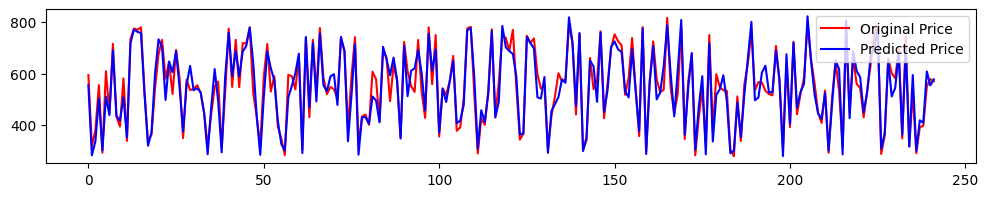

In [ ]:
plt.figure(figsize=(12,2)),
plt.plot(y_test_true,color='red',label='Original Price')
plt.plot(y_pred,color='blue',label='Predicted Price')
plt.legend()

Bidirectional LSTM

In [ ]:
from keras.layers import Bidirectional
bi_model=Sequential()
bi_model.add(Bidirectional(LSTM(units=50,activation='tanh', return_sequences=True),input_shape=(50,3)))
bi_model.add(Dropout(0.2))
bi_model.add(Bidirectional(LSTM(units=50,activation='tanh',return_sequences=True)))
bi_model.add(Dropout(0.2))
bi_model.add(Bidirectional(LSTM(50, activation='tanh')))
bi_model.add(Dropout(0.2))
bi_model.add(Dense(1,activation='linear'))
bi_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])

In [ ]:
bi_model.fit(x_train,y_train,epochs=10, batch_size=10,verbose=1)

Epoch 1/10
97/97 [==============================] - 15s 72ms/step - loss: 0.0174 - mse: 0.0174
Epoch 2/10
97/97 [==============================] - 7s 69ms/step - loss: 0.0102 - mse: 0.0102
Epoch 3/10
97/97 [==============================] - 7s 67ms/step - loss: 0.0103 - mse: 0.0103
Epoch 4/10
97/97 [==============================] - 7s 69ms/step - loss: 0.0096 - mse: 0.0096
Epoch 5/10
97/97 [==============================] - 6s 57ms/step - loss: 0.0093 - mse: 0.0093
Epoch 6/10
97/97 [==============================] - 6s 63ms/step - loss: 0.0085 - mse: 0.0085
Epoch 7/10
97/97 [==============================] - 6s 62ms/step - loss: 0.0089 - mse: 0.0089
Epoch 8/10
97/97 [==============================] - 6s 58ms/step - loss: 0.0080 - mse: 0.0080
Epoch 9/10
97/97 [==============================] - 7s 72ms/step - loss: 0.0079 - mse: 0.0079
Epoch 10/10
97/97 [==============================] - 6s 64ms/step - loss: 0.0082 - mse: 0.0082


In [ ]:
y_pred_scaled=model.predict(x_test)

y_pred=scaler.inverse_transform(y_pred_scaled)
y_test_true=scaler.inverse_transform(y_test)

8/8 [==============================] - 0s 12ms/step


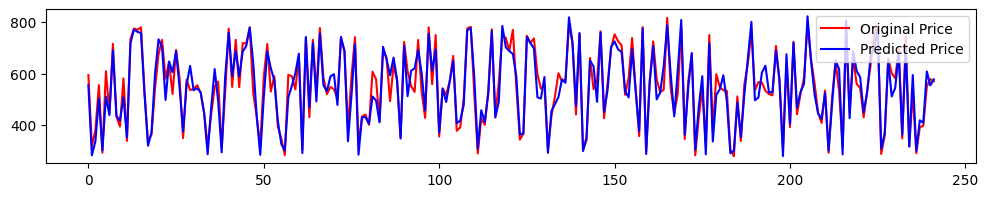

In [ ]:
plt.figure(figsize=(12,2)),
plt.plot(y_test_true,color='red',label='Original Price')
plt.plot(y_pred,color='blue',label='Predicted Price')
plt.legend()